In [1]:
%matplotlib inline


# Recursive feature elimination with cross-validation

A recursive feature elimination example with automatic tuning of the
number of features selected with cross-validation.


Optimal number of features : 3


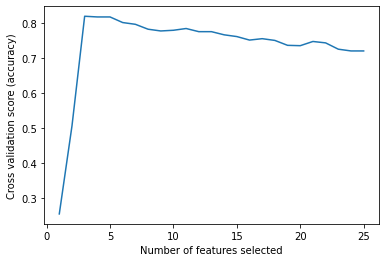

In [2]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(
    n_samples=1000,
    n_features=25,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    random_state=0,
)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [3]:
rfecv.grid_scores_

array([0.256, 0.507, 0.82 , 0.818, 0.818, 0.802, 0.797, 0.783, 0.778,
       0.78 , 0.785, 0.776, 0.776, 0.767, 0.762, 0.752, 0.756, 0.751,
       0.737, 0.736, 0.748, 0.744, 0.726, 0.721, 0.721])